**Application on the Boston Housing data from sklearn. This data has 506 observations, each with 13 features. These features can be used to predict the median values of the houses.**

Load necessary packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

Load the Boston Housing data

In [2]:
boston = fetch_openml(name='boston', version=1)
X, y = boston.data, boston.target

/usr/local/lib/python3.9/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Plot the Boston Housing data by looking at the relationship between feature RM (i.e., average number of rooms per dwelling) and housing prices. We can see that there seems to be a linear relationship.

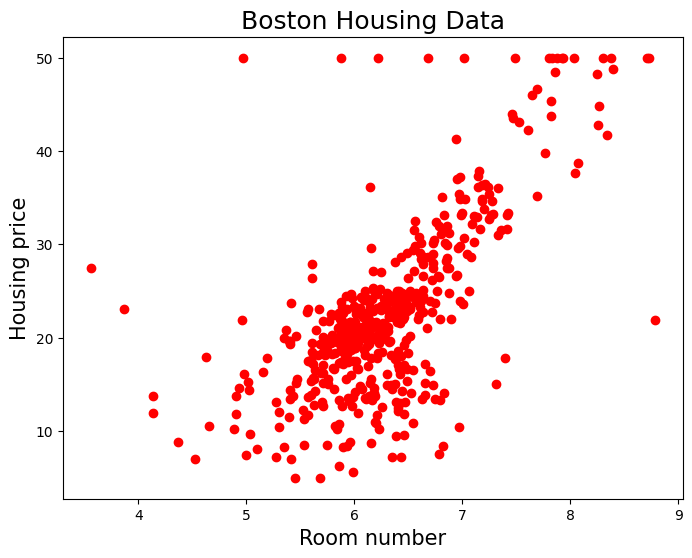

In [3]:
RM = X.RM
price = y.values

plt.figure(figsize=(8,6))
plt.scatter(RM, price, color = "red")
plt.xlabel("Room number", fontsize = 15)
plt.ylabel("Housing price", fontsize = 15)
plt.title("Boston Housing Data", fontsize = 18)
plt.show()

Build the single neuron class with stochastic gradient descent updating rules

In [5]:
class SingleNeuron(object):
    def __init__(self, activation_function):
        self.activation_function = activation_function
    
    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X,y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                errors += .5*((self.predict(xi) - target)**2)
            self.errors_.append(errors/N)
        return self
    
    def predict(self,X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

Define a linear activiation function

In [6]:
def linear_activation(z):
    return z

Apply the single neuron to find the linear relationship

In [7]:
node = SingleNeuron(linear_activation)
RM = np.array(RM)
RM = RM.reshape(-1,1)
node.train(RM, price, alpha=0.00001, epochs=50)

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

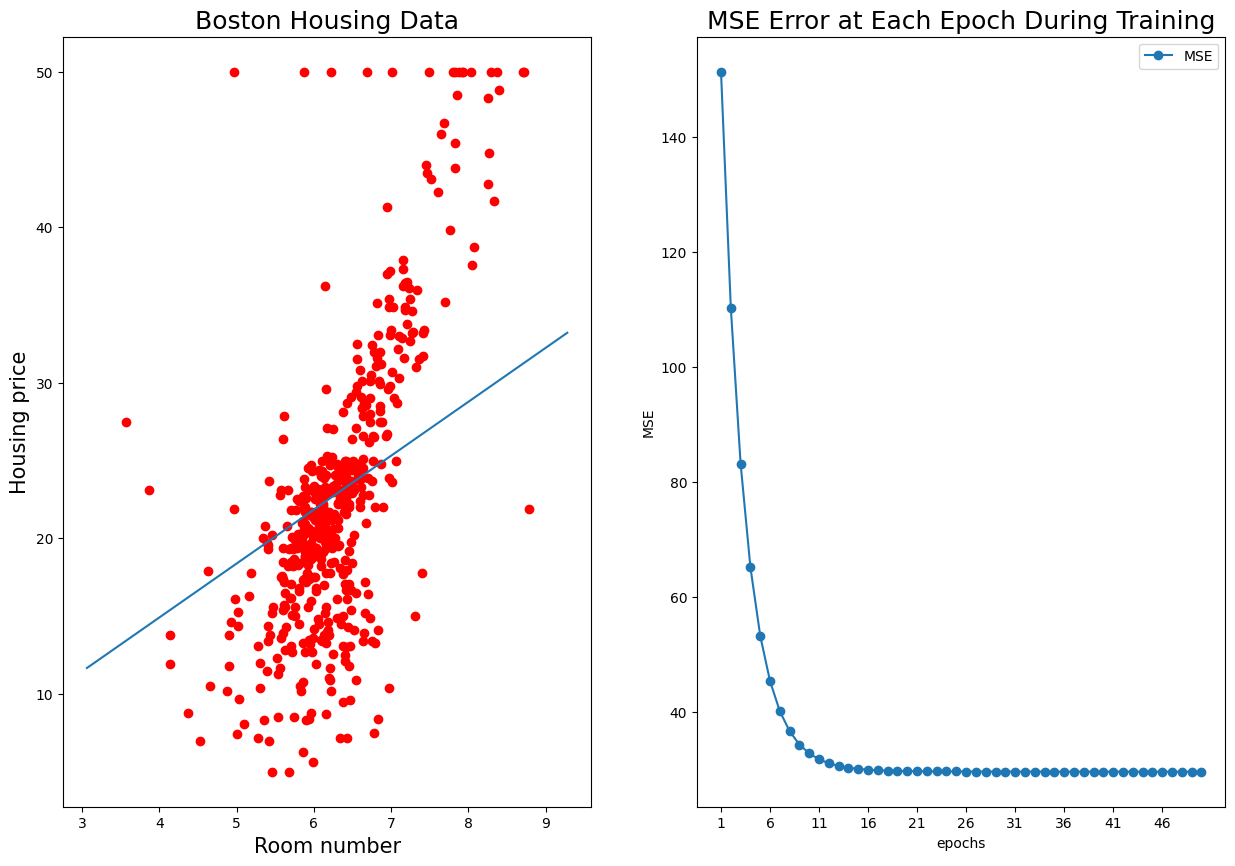

In [8]:
domain = np.linspace(np.min(RM) - .5, np.max(RM) + .5, 100)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))

ax1.scatter(RM, price, color = "red")
ax1.plot(domain, node.predict(domain.reshape(-1,1)))
ax1.set_xlabel("Room number", fontsize = 15)
ax1.set_ylabel("Housing price", fontsize = 15)
ax1.set_title("Boston Housing Data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1),
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

<span style="color: blue;">In summary, the linear regression model indeed help us find the linear relationship between the room number and housing price</span>

So far, we have not spilt the data into test data and train data. I will do this in the next step and also use all the 13 features to predict the housing price.

In [9]:
# Split the data into 30% training and 70% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train['CHAS'] = X_train['CHAS'].astype(float)
X_train['RAD'] = X_train['RAD'].astype(float)
X_test['CHAS'] = X_test['CHAS'].astype(float)
X_test['RAD'] = X_test['RAD'].astype(float)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = lr_model.score(X_test, y_test)

print(f'RMSE: {rmse:.2f}')
print(f'R^2: {r2:.2f}')

RMSE: 4.45
R^2: 0.78


<span style="color: blue;">By using all 13 features and spliting the data into 30% training data and 70% testing data, we finally train and get a linear regression model with $R^2 = 0.78$ when running on the testing data.</span>

---

### Conclusion

We have shown that linear regression is quite useful in the Boston Housing dataset. Although the relationship between the 13 features and the housing price may be more complex in the real world, linear regression models do give us good predictions to begin with. It can show us which features are more important and whether the features are positively or negatively related to housing prices.